In [87]:
import pickle
import pandas as pd

from data.make_dataset import load_data
from features.build_features import multi_ordinal_encoder, get_best_correlation_columns, choose_columns

In [88]:
decision_tree_model = pickle.load(open('models/models/decision_tree_regressor_model.sav', 'rb'))
random_forest_model = pickle.load(open('models/models/random_forest_regressor_model.sav', 'rb'))
ada_boost_model = pickle.load(open('models/models/ada_boost_regressor_model.sav', 'rb'))
xgboost_model = pickle.load(open('models/models/xgboost_regressor_model.sav', 'rb'))

In [89]:
from sklearn.preprocessing import OrdinalEncoder

In [90]:
df = load_data('../data/raw/train.csv')
oe = OrdinalEncoder()
df = multi_ordinal_encoder(df, oe)

best_columns = get_best_correlation_columns(df, 'SalePrice', .5)
X_test = choose_columns(df, best_columns)
y_test = choose_columns(df, ['SalePrice'])

In [91]:
predict_decision_tree = decision_tree_model.predict(X_test)
predict_random_forest = random_forest_model.predict(X_test)
predict_ada_boost = ada_boost_model.predict(X_test)
predict_xgboost = xgboost_model.predict(X_test)

In [92]:
df_ris = pd.DataFrame(columns=['y_true'])
df_ris.y_true = y_test.values.squeeze()
df_ris['predict_decision_tree'] = predict_decision_tree
df_ris['predict_random_forest'] = predict_random_forest
df_ris['predict_ada_boost'] = predict_ada_boost
df_ris['predict_xgboost'] = predict_xgboost
df_ris['error_decision_tree'] = round(df_ris['y_true'] - df_ris['predict_decision_tree'], 0)
df_ris['error_random_forest'] = round(df_ris['y_true'] - df_ris['predict_random_forest'], 0)
df_ris['error_ada_boost'] = round(df_ris['y_true'] - df_ris['predict_ada_boost'],0)
df_ris['error_xgboost'] = round(df_ris['y_true'] - df_ris['predict_xgboost'],0)
df_ris

,y_true,predict_decision_tree,predict_random_forest,predict_ada_boost,predict_xgboost,error_decision_tree,error_random_forest,error_ada_boost,error_xgboost
0,208500,189500.0,195636.6400,201315.937743,208326.234375,19000.0,12863.0,7184.0,174.0
1,181500,165000.0,167138.8100,160816.420814,179299.562500,16500.0,14361.0,20684.0,2200.0
2,223500,189500.0,212992.6425,206187.925287,222992.718750,34000.0,10507.0,17312.0,507.0
3,140000,111250.0,170738.7675,173825.295699,140301.578125,28750.0,-30739.0,-33825.0,-302.0
4,250000,262000.0,278633.8100,271791.564103,250700.156250,-12000.0,-28634.0,-21792.0,-700.0
...,...,...,...,...,...,...,...,...,...
1453,175000,175950.0,179602.4200,172660.247967,174004.781250,-950.0,-4602.0,2340.0,995.0
1454,210000,239000.0,214020.7100,224638.575130,209714.515625,-29000.0,-4021.0,-14639.0,285.0
1455,266500,263750.0,264572.1975,234136.500000,266575.968750,2750.0,1928.0,32364.0,-76.0
1456,142125,140000.0,134650.2500,127507.759874,140509.671875,2125.0,7475.0,14617.0,1615.0


In [93]:
import seaborn as sns
import matplotlib.pyplot as plt

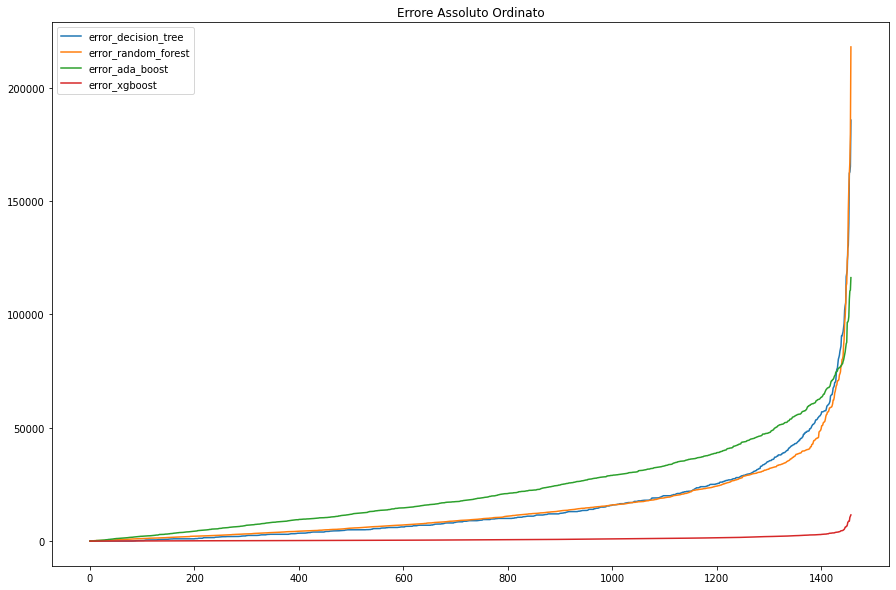

In [94]:
plt.figure(figsize=(15,10))
plt.title("Errore Assoluto Ordinato")
plt.plot(df_ris['error_decision_tree'].abs().sort_values().values.squeeze(), label="error_decision_tree")
plt.plot(df_ris['error_random_forest'].abs().sort_values().values.squeeze(), label="error_random_forest")
plt.plot(df_ris['error_ada_boost'].abs().sort_values().values.squeeze(), label="error_ada_boost")
plt.plot(df_ris['error_xgboost'].abs().sort_values().values.squeeze(), label="error_xgboost")
plt.legend()
plt.savefig('graph/errore_assoluto_ordinato.png')


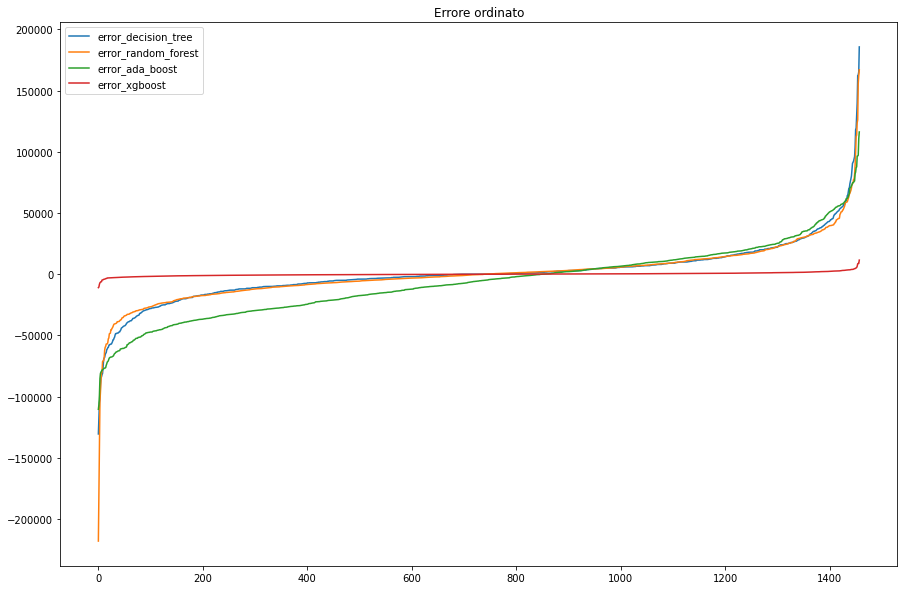

In [95]:
plt.figure(figsize=(15,10))
plt.title('Errore ordinato')
plt.plot(df_ris['error_decision_tree'].sort_values().values.squeeze(), label="error_decision_tree")
plt.plot(df_ris['error_random_forest'].sort_values().values.squeeze(), label="error_random_forest")
plt.plot(df_ris['error_ada_boost'].sort_values().values.squeeze(), label="error_ada_boost")
plt.plot(df_ris['error_xgboost'].sort_values().values.squeeze(), label="error_xgboost")
plt.legend()
plt.savefig('graph/errore_ordinato.png')

In [96]:
from sklearn.metrics import mean_absolute_error

mae_decision_tree = mean_absolute_error(df_ris['y_true'], df_ris['predict_decision_tree'])
mae_random_forest = mean_absolute_error(df_ris['y_true'], df_ris['predict_random_forest'])
mae_ada_boost = mean_absolute_error(df_ris['y_true'], df_ris['predict_ada_boost'])
mae_xgboost = mean_absolute_error(df_ris['y_true'], df_ris['predict_xgboost'])

In [97]:
mae_random_forest

14823.31379286694

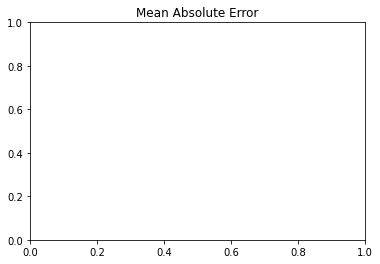

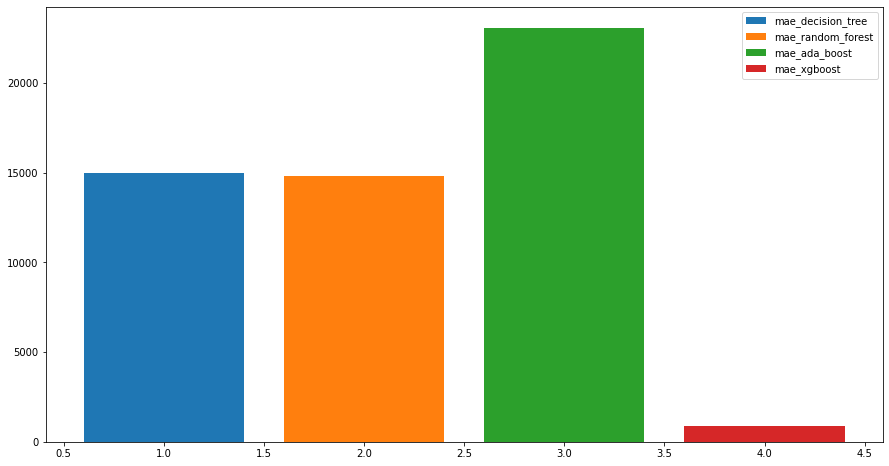

In [98]:
plt.title('Mean Absolute Error')
plt.figure(figsize=(15,8))
plt.bar(1,mae_decision_tree, label="mae_decision_tree")
plt.bar(2,mae_random_forest, label="mae_random_forest")
plt.bar(3,mae_ada_boost, label="mae_ada_boost")
plt.bar(4,mae_xgboost, label="mae_xgboost")
plt.legend()
plt.savefig('graph/mean_absolute_error.png')